# trim_floating_solid
``trim_floating_solid``function is a filter which removes solids not attached to primary solid structure.

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import scipy
import matplotlib.pyplot as plt
import skimage

## Generate Test Image
Two test images are generated using the blobs generator. The first image is two dimensional having shape 500 by 500 while the second image is three dimensional having shape 500 by 500 by 500. How floating solids are removed and the result can depend on whether the image is 2D or 3D so here we investigate both cases.  The 2D and 3D images are then visualized but only a slice of the 3D image is shown.

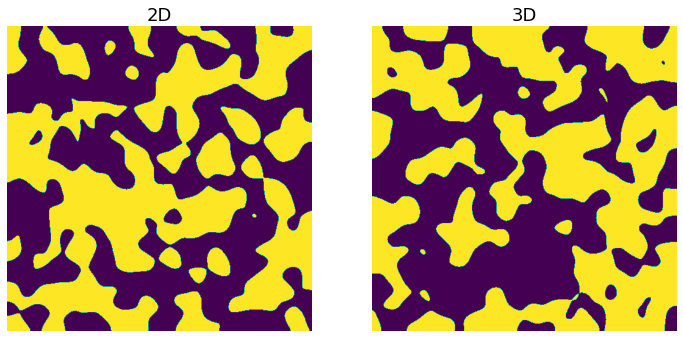

In [2]:
im2d = ps.generators.blobs(shape=[500, 500])
im3d = ps.generators.blobs(shape=[500, 500, 500])

fig, ax = plt.subplots(1, 2, figsize=[12, 12]);
ax[0].imshow(im2d);
ax[0].axis(False);
ax[0].set_title('2D', fontdict={'fontsize': 18});
ax[1].imshow(im3d.take(indices=250, axis=2));
ax[1].axis(False);
ax[1].set_title('3D', fontdict={'fontsize': 18});

## Apply Filter
Next we apply the ``trim_floating_solid`` filter to the 2D and 3D test images. For the 2D image, conn options are 4 and 8 for square and diagonal neighbours respectively. Both options are tested and the resulting filtered images compared. It should be apparent that all floating solids are removed.

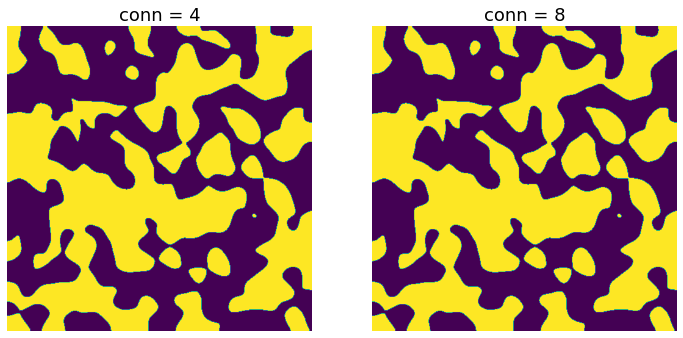

In [3]:
x1 = ps.filters.trim_floating_solid(im=im2d, conn=4)
x2 = ps.filters.trim_floating_solid(im=im2d, conn=8)

fig, ax = plt.subplots(1, 2, figsize=[12, 12]);
ax[0].imshow(x1);
ax[0].axis(False);
ax[0].set_title('conn = 4', fontdict={'fontsize': 18});
ax[1].imshow(x2);
ax[1].axis(False);
ax[1].set_title('conn = 8', fontdict={'fontsize': 18});

For the 3D image, conn options are 6 and 26 for similarly square and diagonal neighbours. Again, both options are visualized and compared for the 3D case.  It is not so obvious in the 3D case that all floating solids are removed because the visualization is a single 2D slice of a 3D image. This means that apparent floating solids in the 2D slice may actually be attached to solid in adjacent 2D slice and therefore may not actually be considered to be floating.

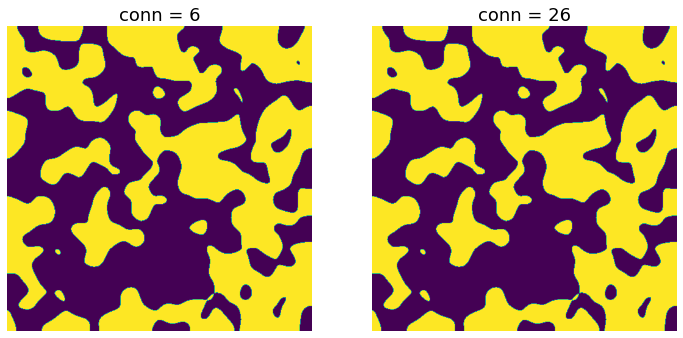

In [4]:
x3 = ps.filters.trim_floating_solid(im=im3d, conn=6)
x4 = ps.filters.trim_floating_solid(im=im3d, conn=26)

fig, ax = plt.subplots(1, 2, figsize=[12, 12]);
ax[0].imshow(x3.take(indices=250, axis=2));
ax[0].axis(False);
ax[0].set_title('conn = 6', fontdict={'fontsize': 18});
ax[1].imshow(x4.take(indices=250, axis=2));
ax[1].axis(False);
ax[1].set_title('conn = 26', fontdict={'fontsize': 18});